
# Dimensionality Reduction

Dimensionality reduction refers to techniques for reducing the number of input variables in training data. High-dimensional datasets can be difficult to analyze and visualize. Moreover, they often contain redundant information, which may lead to decreased performance in machine learning models, a phenomenon known as the "curse of dimensionality".

## Why Dimensionality Reduction?

- To simplify models to make them easier to interpret by researchers/users.
- To reduce the computational cost of model training.
- To alleviate the "curse of dimensionality" and improve model performance.
- To enable visualization of high-dimensional data.

## Principal Component Analysis (PCA)

PCA is a technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize. PCA can also be used as a dimensionality reduction technique.

### The Algorithm

PCA transforms the original data into a new set of dimensions, the principal components (PCs), which are orthogonal (uncorrelated) linear combinations of the original variables. The first PC accounts for as much of the variability in the data as possible, and each succeeding component accounts for as much of the remaining variability as possible.

The PCA transformation can be summarized by the eigen-decomposition of the covariance matrix of the data or by a singular value decomposition (SVD) of the data matrix itself.

#### Eigen-decomposition Approach

Given a data matrix \(X\), the covariance matrix is given by:

$$ C =
rac{1}{n-1} (X - \overline{X})^	op (X - \overline{X}) $$

where \(\overline{X}\) is the mean vector of the original data. The eigenvectors of \(C\) give the directions of the PCs, and the eigenvalues give their magnitude.

#### SVD Approach

SVD decomposes the data matrix \(X\) into three matrices:

$$ X = UDV^	op $$

where the columns of \(V\) are the directions of the PCs and the columns of \(U\) are the PCs themselves.


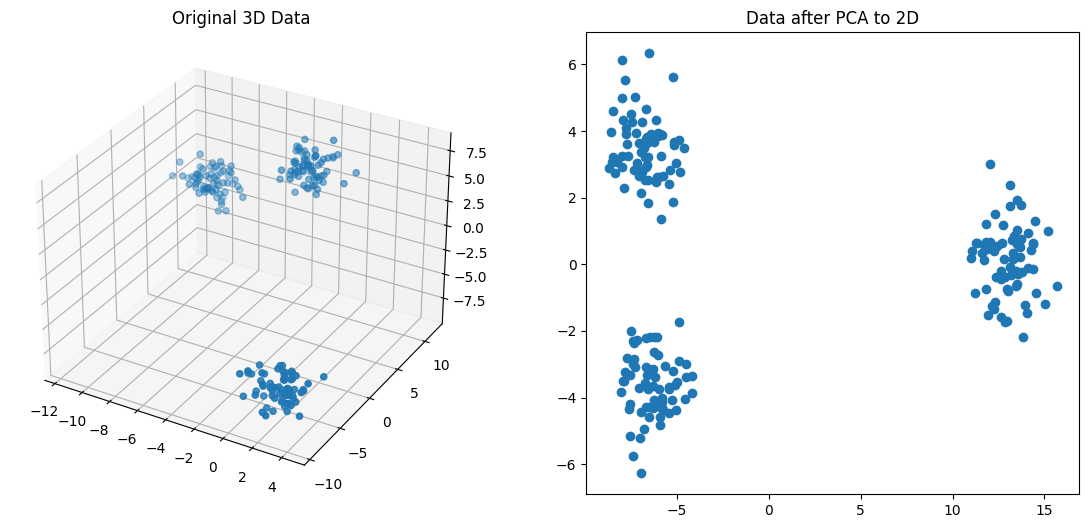

In [1]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# Generating synthetic 3D data
X, _ = make_blobs(n_samples=200, centers=3, n_features=3, random_state=42)

# Apply PCA and reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

# Plotting the 3D data
fig = plt.figure(figsize=(14, 6))

# Before PCA
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_title('Original 3D Data')

# After PCA to 2D
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(X_pca[:, 0], X_pca[:, 1])
ax2.set_title('Data after PCA to 2D')

plt.show()


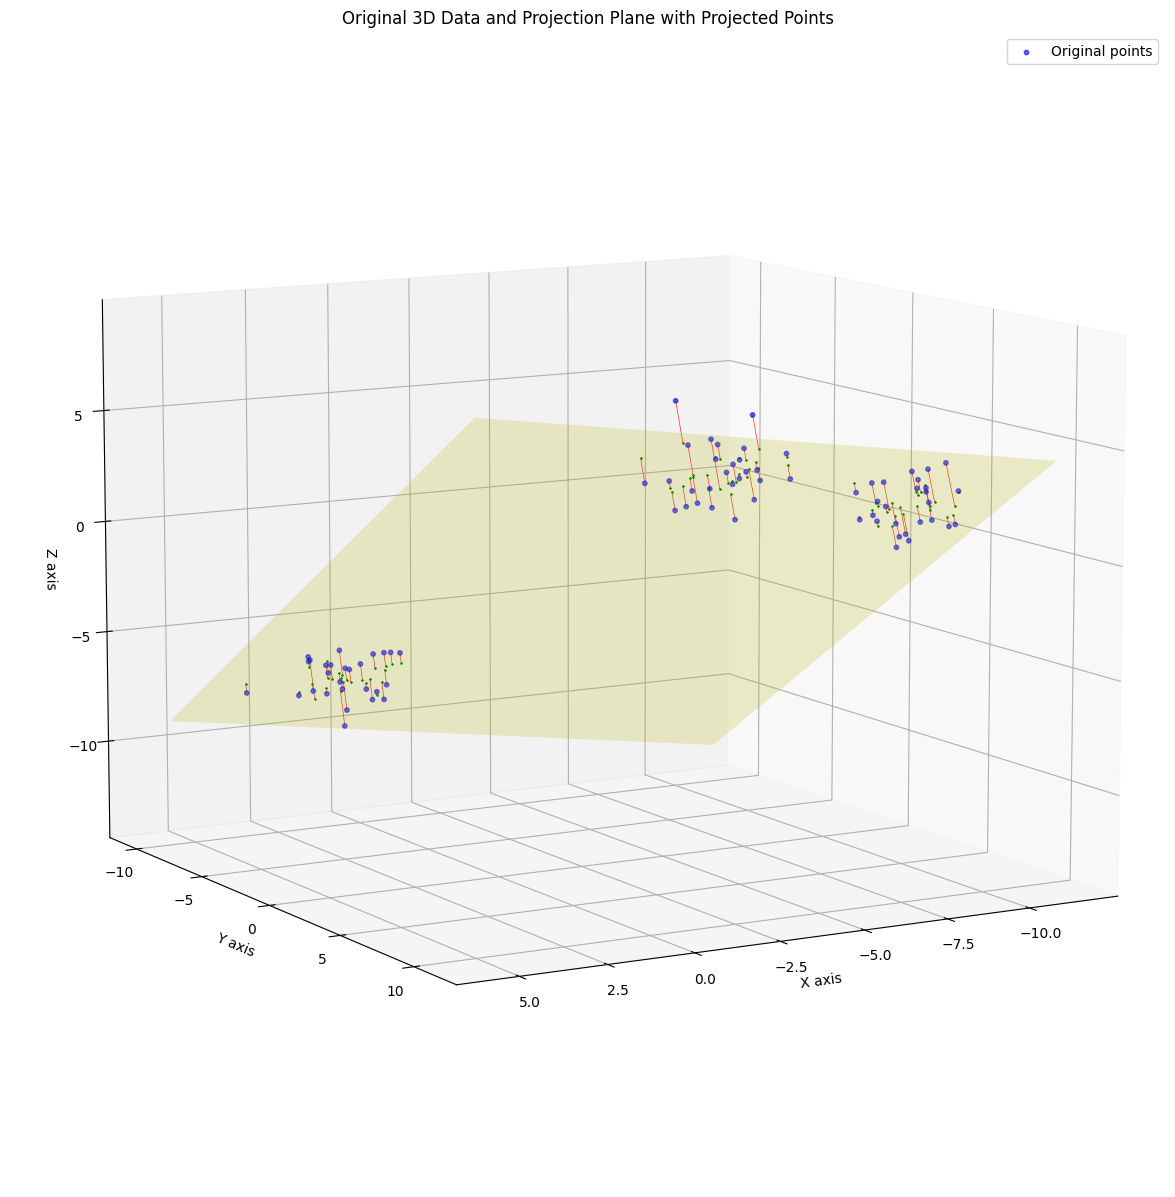

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# Generate synthetic 3D data
X, _ = make_blobs(n_samples=80, centers=3, n_features=3, random_state=42)

# Apply PCA and reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
X_projected = pca.inverse_transform(X_pca)  # Projected points back in 3D space

# Plotting the 3D data
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(111, projection='3d')

# Plotting the original data points
ax.scatter(X[:, 0], X[:, 1], X[:, 2], color='b', alpha=0.6, label='Original points', s=10)

# Plane equation coefficients
# The normal vector to the projection plane is orthogonal to the first two principal components
plane_normal = np.cross(pca.components_[0], pca.components_[1])
d = -plane_normal.dot(pca.mean_)

# Create a grid of points for the plane within the bounds of the data
x_range = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 10)
y_range = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 10)
xx, yy = np.meshgrid(x_range, y_range)
zz = (-plane_normal[0] * xx - plane_normal[1] * yy - d) / plane_normal[2]

# Plotting the projection plane
ax.plot_surface(xx, yy, zz, alpha=0.2, color='y')

# Plotting the projection lines and projected points on the plane
for i in range(len(X)):
    # Each point in X_projected lies within the plane, draw a line from the original point to its projected version
    ax.plot([X[i, 0], X_projected[i, 0]], [X[i, 1], X_projected[i, 1]], [X[i, 2], X_projected[i, 2]], 'r-', linewidth=0.4)
    # Also, plot the projection of the point (its 'shadow' on the plane) using green 'X' markers
    ax.scatter(X_projected[i, 0], X_projected[i, 1], X_projected[i, 2], color='g', marker='X', s=0.5)

ax.set_title('Original 3D Data and Projection Plane with Projected Points')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.legend()

# Set the initial view angle to best visualize the projection plane and the projected points
ax.view_init(elev=10, azim=60)

plt.show()


In [26]:
import numpy as np
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# Generate synthetic 3D data
X, _ = make_blobs(n_samples=80, centers=3, n_features=3, random_state=42)

# Apply PCA and reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
X_projected = pca.inverse_transform(X_pca)  # Projected points back in 3D space

# Plane equation coefficients
plane_normal = np.cross(pca.components_[0], pca.components_[1])
d = -plane_normal.dot(pca.mean_)

# Create a grid of points for the plane within the bounds of the data
x_range = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 10)
y_range = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 10)
xx, yy = np.meshgrid(x_range, y_range)
zz = (-plane_normal[0] * xx - plane_normal[1] * yy - d) / plane_normal[2]

# Create the 3D plot
fig = go.Figure()

# Plotting the original data points
fig.add_trace(go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2],
                           mode='markers', marker=dict(size=3, color='blue'),
                           name='Original Points'))

# Plotting the projected points on the plane
fig.add_trace(go.Scatter3d(x=X_projected[:, 0], y=X_projected[:, 1], z=X_projected[:, 2],
                           mode='markers', marker=dict(size=3, color='green', symbol='x'),
                           name='Projected Points'))

# Plotting the projection plane
fig.add_trace(go.Surface(x=xx, y=yy, z=zz, opacity=0.5, showscale=False, name='Projection Plane'))

# Plotting the projection lines
for i in range(len(X)):
    fig.add_trace(go.Scatter3d(x=[X[i, 0], X_projected[i, 0]], y=[X[i, 1], X_projected[i, 1]],
                               z=[X[i, 2], X_projected[i, 2]], mode='lines', line=dict(color='red', width=2),
                               showlegend=False))

# Setting the layout of the figure
fig.update_layout(title='3D Data Visualization with Projection Plane', scene=dict(
                    xaxis_title='X Axis',
                    yaxis_title='Y Axis',
                    zaxis_title='Z Axis'),
                  margin=dict(l=0, r=0, b=0, t=30))

fig.show()
